In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import linearmodels as lm
import linearmodels.panel as lmp
import seaborn as sns

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
country = list(df.country.unique())
df = df.set_index(["country", "yr"])

color = np.array([
    [c] * 13 for c in sns.color_palette("icefire", len(country)).as_hex()
]).flatten()

df["yr"] = yr
df["_color"] = color
df

lat     long  inbtou_volume  inbtou_volume_ov   
country             yr                                                        
antigua_and_barbuda 2010  17.0608 -61.7964   8.128600e+05               NaN  \
                    2011  17.0608 -61.7964   8.702400e+05               NaN   
                    2012  17.0608 -61.7964   8.426900e+05               NaN   
                    2013  17.0608 -61.7964   8.055500e+05               NaN   
                    2014  17.0608 -61.7964   7.925900e+05               NaN   
...                           ...      ...            ...               ...   
us_virgin_islands   2018  18.3358 -64.8963   1.922000e+09               NaN   
                    2019  18.3358 -64.8963   2.074000e+09               NaN   
                    2020  18.3358 -64.8963   8.620000e+08               NaN   
                    2021  18.3358 -64.8963            NaN               NaN   
                    2022  18.3358 -64.8963            NaN               NaN   

                          inbtou_volume_sd  inbtou_volume_air   
country             yr                                          
antigua_and_barbuda 2010               NaN                NaN  \
                    2011               NaN                NaN   
                    2012               NaN                NaN   
                    2013               NaN                NaN   
                    2014               NaN                NaN   
...                                    ...                ...   
us_virgin_islands   2018               NaN                NaN   
                    2019               NaN                NaN   
                    2020               NaN                NaN   
                    2021               NaN                NaN   
                    2022               NaN                NaN   

                          inbtou_volume_cruise  inbtou_spending   
country             yr                                            
antigua_and_barbuda 2010                   NaN      568930500.0  \
                    2011                   NaN      598619300.0   
                    2012                   NaN      666070300.0   
                    2013                   NaN      658851600.0   
                    2014                   NaN      595796200.0   
...                                        ...              ...   
us_virgin_islands   2018                   NaN              NaN   
                    2019                   NaN              NaN   
                    2020                   NaN              NaN   
                    2021                   NaN              NaN   
                    2022                   NaN              NaN   

                          inbtou_spending_travel  inbtou_spending_transport   
country             yr                                                        
antigua_and_barbuda 2010                     NaN                        NaN  \
                    2011                     NaN                        NaN   
                    2012                     NaN                        NaN   
                    2013                     NaN                        NaN   
                    2014                     NaN                        NaN   
...                                          ...                        ...   
us_virgin_islands   2018                     NaN                        NaN   
                    2019                     NaN                        NaN   
                    2020                     NaN                        NaN   
                    2021                     NaN                        NaN   
                    2022                     NaN                        NaN   

                          covid19_cases  covid19_deaths  covid19_mortality   
country             yr                                                       
antigua_and_barbuda 2010              0               0           0.000000  \
                    20

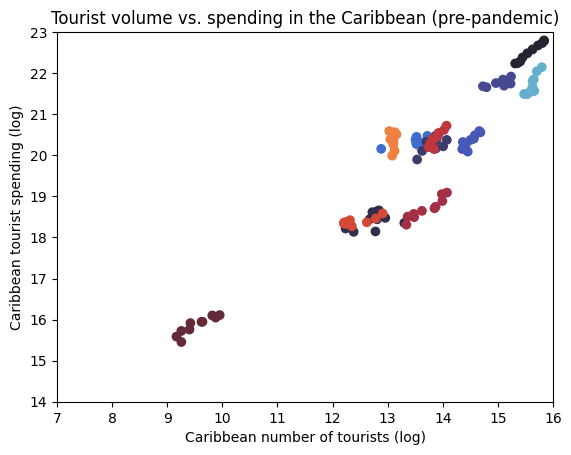

                 inbtou_volume  inbtou_spending
inbtou_volume         1.000000         0.891849
inbtou_spending       0.891849         1.000000


In [32]:
_df = df.loc[df["yr"] < 2020]
x = _df["inbtou_volume"]
y = _df["inbtou_spending"]

plt.title("Tourist volume vs. spending in the Caribbean (pre-pandemic)")
plt.xlabel("Caribbean number of tourists (log)")
plt.ylabel("Caribbean tourist spending (log)")
plt.xlim(7, 16)
plt.ylim(14, 23)


plt.scatter(np.log(x), np.log(y), c=_df["_color"])
plt.show()

print(_df[["inbtou_volume", "inbtou_spending"]].corr().iloc[[0, 1]])

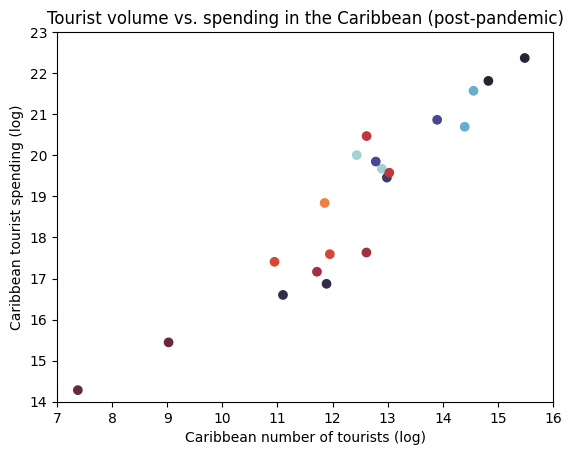

                 inbtou_volume  inbtou_spending
inbtou_volume         1.000000         0.981483
inbtou_spending       0.981483         1.000000


In [31]:
_df = df.loc[df["yr"] >= 2020]
x = _df["inbtou_volume"]
y = _df["inbtou_spending"]

plt.title("Tourist volume vs. spending in the Caribbean (post-pandemic)")
plt.xlabel("Caribbean number of tourists (log)")
plt.ylabel("Caribbean tourist spending (log)")
plt.xlim(7, 16)
plt.ylim(14, 23)

plt.scatter(np.log(x), np.log(y), c=_df["_color"])
plt.show()

print(_df[["inbtou_volume", "inbtou_spending"]].corr().iloc[[0, 1]])

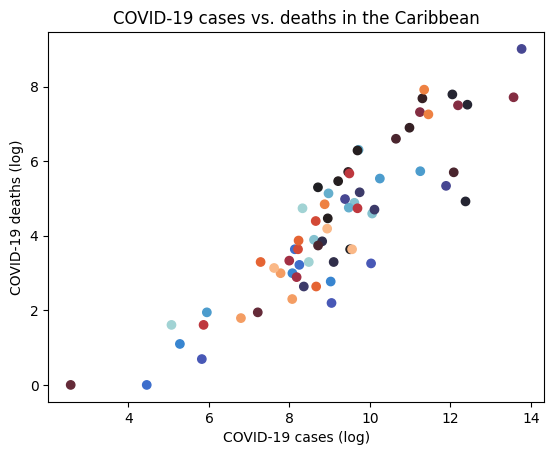

                covid19_cases  covid19_deaths
covid19_cases        1.000000        0.835107
covid19_deaths       0.835107        1.000000


In [27]:
_df = df.loc[(df["yr"] >= 2020) & (df["covid19_cases"] * df["covid19_deaths"] != 0)]
x = _df["covid19_cases"]
y = _df["covid19_deaths"]

plt.title("COVID-19 cases vs. deaths in the Caribbean")
plt.xlabel("COVID-19 cases (log)")
plt.ylabel("COVID-19 deaths (log)")

plt.scatter(np.log(x), np.log(y), c=_df["_color"])
plt.show()

print(_df[["covid19_cases", "covid19_deaths"]].corr())

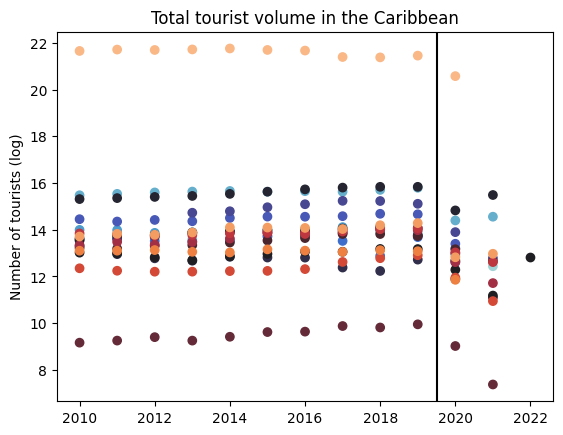

                                     Model Comparison                                    
                               COVID-19 cases       COVID-19 deaths    COVID-19 mortality
-----------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_volume     log_inbtou_volume     log_inbtou_volume
Estimator                            PanelOLS              PanelOLS              PanelOLS
No. Observations                          219                   219                   219
Cov. Est.                          Unadjusted            Unadjusted            Unadjusted
R-squared                              0.1067                0.1295                0.3045
R-Squared (Within)                     0.1067                0.1295                0.3045
R-Squared (Between)                   -0.0078               -0.0093                0.0147
R-Squared (Overall)                   -0.0023               -0.0028                0.0273
F-statisti

In [132]:
y_name = "inbtou_volume"

plt.title("Total tourist volume in the Caribbean")
plt.axvline(x=2019.5, color="black")
plt.ylabel("Number of tourists (log)")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))

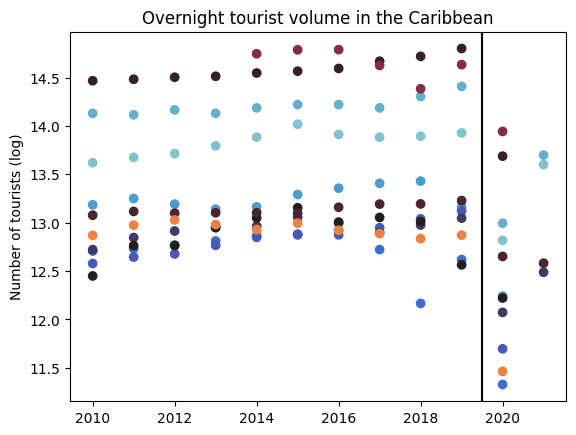

                                         Model Comparison                                         
                                  COVID-19 cases          COVID-19 deaths       COVID-19 mortality
--------------------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_volume_ov     log_inbtou_volume_ov     log_inbtou_volume_ov
Estimator                               PanelOLS                 PanelOLS                 PanelOLS
No. Observations                             121                      121                      121
Cov. Est.                             Unadjusted               Unadjusted               Unadjusted
R-squared                                 0.1602                   0.1483                   0.5547
R-Squared (Within)                        0.1602                   0.1483                   0.5547
R-Squared (Between)                      -0.0920                  -0.0973                  -0.0867
R-Squared 

In [133]:
y_name = "inbtou_volume_ov"

plt.title("Overnight tourist volume in the Caribbean")
plt.ylabel("Number of tourists (log)")
plt.axvline(x=2019.5, color="black")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))

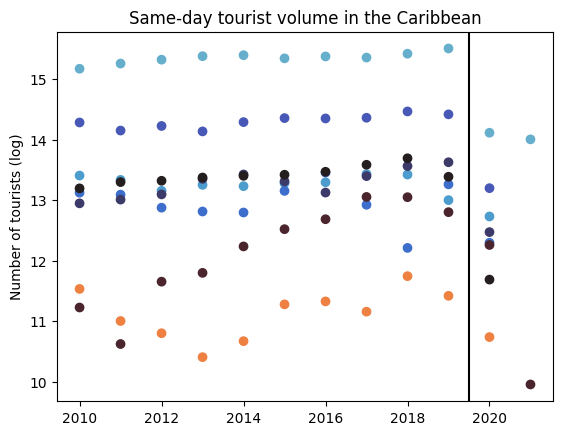

                                         Model Comparison                                         
                                  COVID-19 cases          COVID-19 deaths       COVID-19 mortality
--------------------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_volume_sd     log_inbtou_volume_sd     log_inbtou_volume_sd
Estimator                               PanelOLS                 PanelOLS                 PanelOLS
No. Observations                              90                       90                       90
Cov. Est.                             Unadjusted               Unadjusted               Unadjusted
R-squared                                 0.3867                   0.3928                   0.4081
R-Squared (Within)                        0.3867                   0.3928                   0.4081
R-Squared (Between)                       0.0142                  -0.0206                  -0.0492
R-Squared 

In [124]:
y_name = "inbtou_volume_sd"

plt.title("Same-day tourist volume in the Caribbean")
plt.ylabel("Number of tourists (log)")
plt.axvline(x=2019.5, color="black")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))

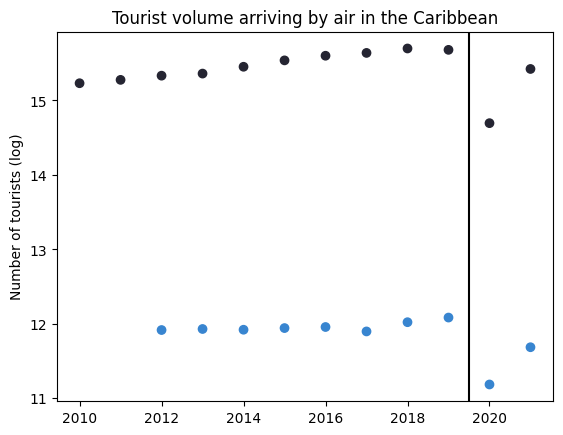

                                           Model Comparison                                          
                                   COVID-19 cases           COVID-19 deaths        COVID-19 mortality
-----------------------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_volume_air     log_inbtou_volume_air     log_inbtou_volume_air
Estimator                                PanelOLS                  PanelOLS                  PanelOLS
No. Observations                               22                        22                        22
Cov. Est.                              Unadjusted                Unadjusted                Unadjusted
R-squared                                  0.1326                    0.2674                    0.7212
R-Squared (Within)                         0.1326                    0.2674                    0.7212
R-Squared (Between)                       -0.0394                   -0.0531       

In [125]:
y_name = "inbtou_volume_air"

plt.title("Tourist volume arriving by air in the Caribbean")
plt.ylabel("Number of tourists (log)")
plt.axvline(x=2019.5, color="black")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))

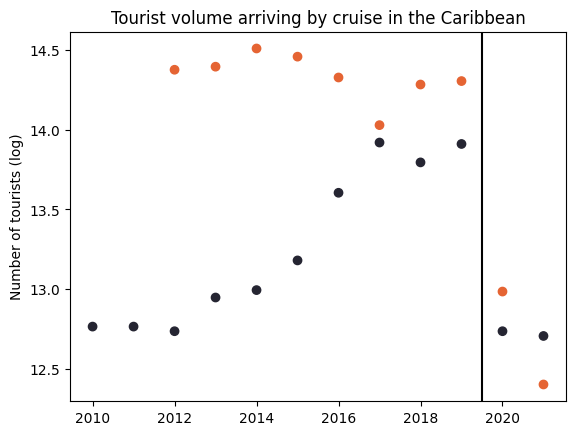

                                               Model Comparison                                               
                                      COVID-19 cases              COVID-19 deaths           COVID-19 mortality
--------------------------------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_volume_cruise     log_inbtou_volume_cruise     log_inbtou_volume_cruise
Estimator                                   PanelOLS                     PanelOLS                     PanelOLS
No. Observations                                  22                           22                           22
Cov. Est.                                 Unadjusted                   Unadjusted                   Unadjusted
R-squared                                     0.0699                       0.0717                       0.5271
R-Squared (Within)                            0.0699                       0.0717                       0.5271
R

In [126]:
y_name = "inbtou_volume_cruise"

plt.title("Tourist volume arriving by cruise in the Caribbean")
plt.ylabel("Number of tourists (log)")
plt.axvline(x=2019.5, color="black")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))

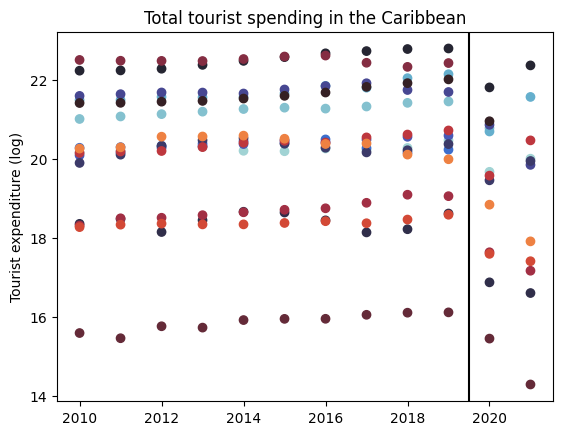

                                        Model Comparison                                       
                                 COVID-19 cases         COVID-19 deaths      COVID-19 mortality
-----------------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_spending     log_inbtou_spending     log_inbtou_spending
Estimator                              PanelOLS                PanelOLS                PanelOLS
No. Observations                            184                     184                     184
Cov. Est.                            Unadjusted              Unadjusted              Unadjusted
R-squared                                0.1357                  0.2067                  0.1821
R-Squared (Within)                       0.1357                  0.2067                  0.1821
R-Squared (Between)                     -0.0176                 -0.0227                  0.0142
R-Squared (Overall)                     

In [127]:
y_name = "inbtou_spending"

plt.title("Total tourist spending in the Caribbean")
plt.ylabel("Tourist expenditure (log)")
plt.axvline(x=2019.5, color="black")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))

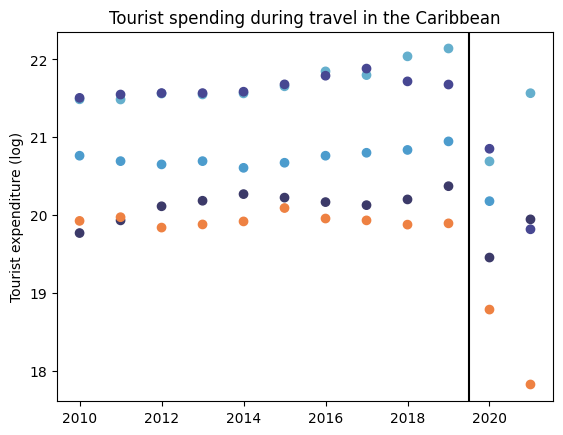

                                                  Model Comparison                                                  
                                        COVID-19 cases                COVID-19 deaths             COVID-19 mortality
--------------------------------------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_spending_travel     log_inbtou_spending_travel     log_inbtou_spending_travel
Estimator                                     PanelOLS                       PanelOLS                       PanelOLS
No. Observations                                    59                             59                             59
Cov. Est.                                   Unadjusted                     Unadjusted                     Unadjusted
R-squared                                       0.3216                         0.4637                         0.5044
R-Squared (Within)                              0.3216          

In [128]:
y_name = "inbtou_spending_travel"

plt.title("Tourist spending during travel in the Caribbean")
plt.ylabel("Tourist expenditure (log)")
plt.axvline(x=2019.5, color="black")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))

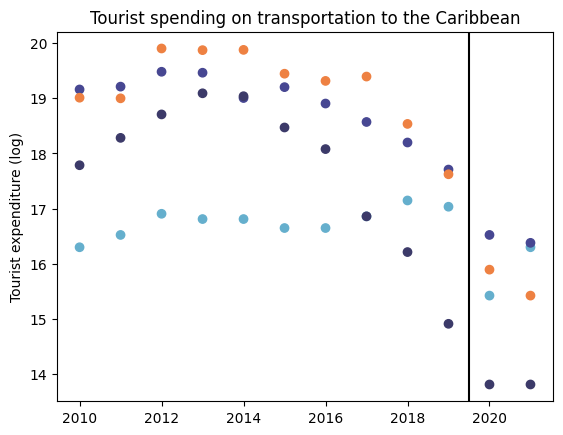

                                                       Model Comparison                                                      
                                           COVID-19 cases                   COVID-19 deaths                COVID-19 mortality
-----------------------------------------------------------------------------------------------------------------------------
Dep. Variable               log_inbtou_spending_transport     log_inbtou_spending_transport     log_inbtou_spending_transport
Estimator                                        PanelOLS                          PanelOLS                          PanelOLS
No. Observations                                       48                                48                                48
Cov. Est.                                      Unadjusted                        Unadjusted                        Unadjusted
R-squared                                          0.0830                            0.1342                           

In [130]:
y_name = "inbtou_spending_transport"

plt.title("Tourist spending on transportation to the Caribbean")
plt.ylabel("Tourist expenditure (log)")
plt.axvline(x=2019.5, color="black")
plt.scatter(x=df['yr'], y=np.log(df[y_name]), c=df["_color"])
plt.show()

_df = df[[y_name, "covid19_cases", "covid19_deaths", "covid19_mortality", "yr"]].dropna()
_df[f"log_{y_name}"] = np.log(_df[y_name])
reg = lambda x_name: (lm
                      .PanelOLS(_df[f"log_{y_name}"], sm.add_constant(_df[x_name]), entity_effects=True)
                      .fit())

print(lmp.compare({
    "COVID-19 cases":     reg("covid19_cases"),
    "COVID-19 deaths":    reg("covid19_deaths"),
    "COVID-19 mortality": reg("covid19_mortality"),
}))